In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset using ExcelFile
excel_file = pd.ExcelFile(r"/content/externalfactors.xlsx")

# Read all sheets into DataFrames
dfs = [pd.read_excel(excel_file, sheet_name=sheet_name) for sheet_name in excel_file.sheet_names]

# Merge all sheets into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame to a new Excel file (optional)
df.to_excel("merged_file.xlsx", index=False)

# Display the first few rows
print(df.head())
# Replace with your file path
df['Date'] = df['Date'].ffill()

        Date  Natural Gas Price  US Crude Oil WTI Prices  \
0 2020-04-02              1.672                    28.05   
1 2020-04-03              1.738                    30.90   
2 2020-04-06              1.844                    29.98   
3 2020-04-07              1.949                    28.69   
4 2020-04-08              1.896                    30.17   

   Non ferrous  metal price  Dubai Crude Oil  Dutch Natural Gas  
0                     85.48            26.16              6.935  
1                     84.54            29.39              6.922  
2                     96.18            27.45              7.287  
3                    101.53            26.00              7.283  
4                    107.42            26.16              7.259  


In [ ]:
df.isnull().sum()

,0
Date,0
Natural Gas Price,1
US Crude Oil WTI Prices,1
Non ferrous metal price,26
Dubai Crude Oil,26
Dutch Natural Gas,5


In [ ]:
df.iloc[:, 0:6] = df.iloc[:, 0:6].ffill()
df.isnull().sum()

,0
Date,0
Natural Gas Price,0
US Crude Oil WTI Prices,0
Non ferrous metal price,0
Dubai Crude Oil,0
Dutch Natural Gas,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1085 non-null   datetime64[ns]
 1   Natural Gas Price         1085 non-null   float64       
 2   US Crude Oil WTI Prices   1085 non-null   float64       
 3   Non ferrous  metal price  1085 non-null   float64       
 4   Dubai Crude Oil           1085 non-null   float64       
 5   Dutch Natural Gas         1085 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 51.0 KB


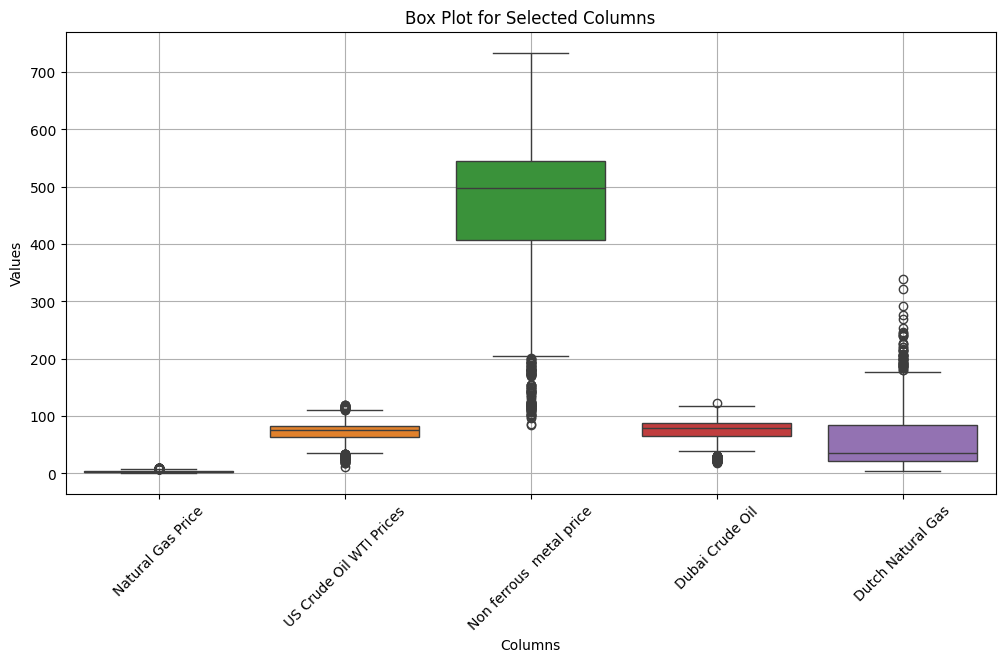

In [ ]:
# Select columns by index (1 to 5)
selected_columns =df.iloc[:, 1:6]  # Index 1 to 5 (Python indexing is zero-based)

# Create box plots for selected columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=selected_columns)
plt.title("Box Plot for Selected Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

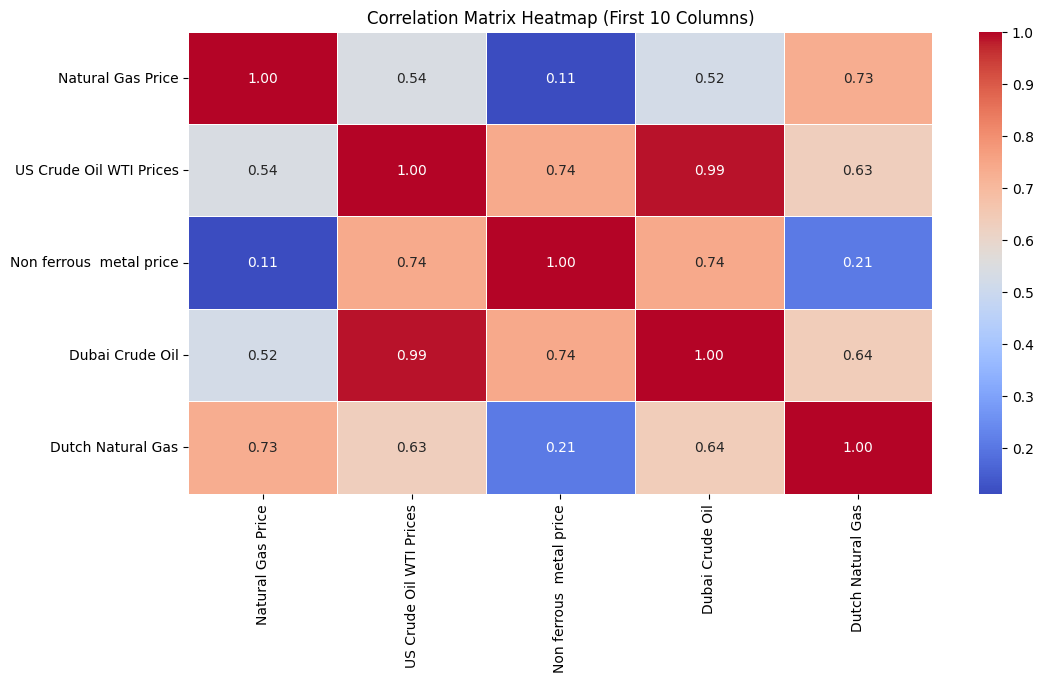

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

# Compute correlation matrix for the first 10 columns
correlation_matrix = df.iloc[:, 1:6].corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap (First 10 Columns)")
plt.show()


In [ ]:
df.drop(['Non ferrous  metal price'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1085 non-null   datetime64[ns]
 1   Natural Gas Price        1085 non-null   float64       
 2   US Crude Oil WTI Prices  1085 non-null   float64       
 3   Dubai Crude Oil          1085 non-null   float64       
 4   Dutch Natural Gas        1085 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 42.5 KB



Processing Natural Gas Price...

Skipping (add, add, 1): seasonal_periods must be larger than 1.


<ipython-input-9-1a78f18e12c8>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean().asfreq("M")  # Resample to Monthly frequency


Skipping (add, mul, 1): seasonal_periods must be larger than 1.
Skipping (mul, add, 1): seasonal_periods must be larger than 1.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Skipping (mul, mul, 1): seasonal_periods must be larger than 1.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Skipping (None, add, 1): seasonal_periods must be larger than 1.
Skipping (None, mul, 1): seasonal_periods must be larger than 1.


<ipython-input-9-1a78f18e12c8>:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index.max(), periods=31, freq="M")[1:]  # Generate future dates


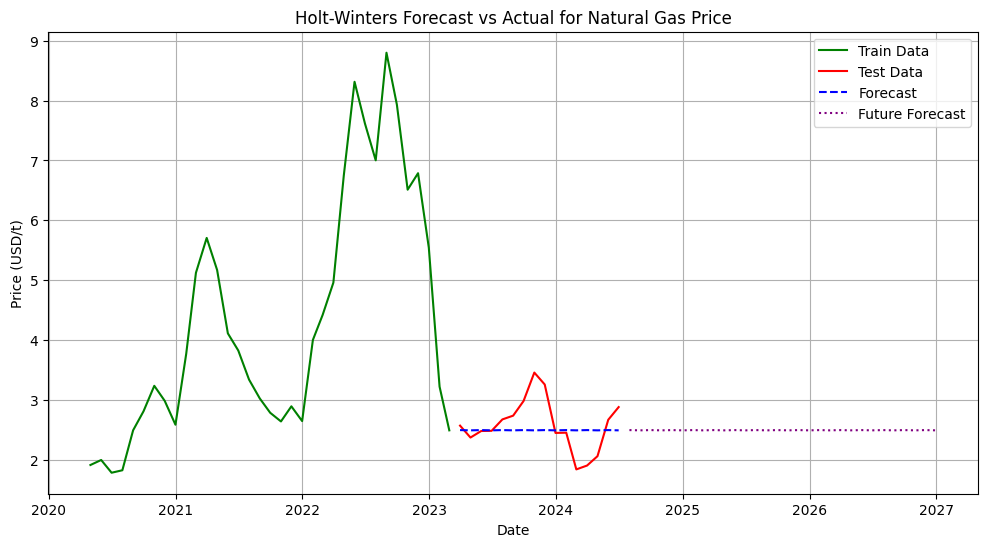


Processing US Crude Oil WTI Prices...

Skipping (add, add, 1): seasonal_periods must be larger than 1.
Skipping (add, mul, 1): seasonal_periods must be larger than 1.
Skipping (mul, add, 1): seasonal_periods must be larger than 1.
Skipping (mul, mul, 1): seasonal_periods must be larger than 1.
Skipping (None, add, 1): seasonal_periods must be larger than 1.
Skipping (None, mul, 1): seasonal_periods must be larger than 1.


<ipython-input-9-1a78f18e12c8>:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index.max(), periods=31, freq="M")[1:]  # Generate future dates


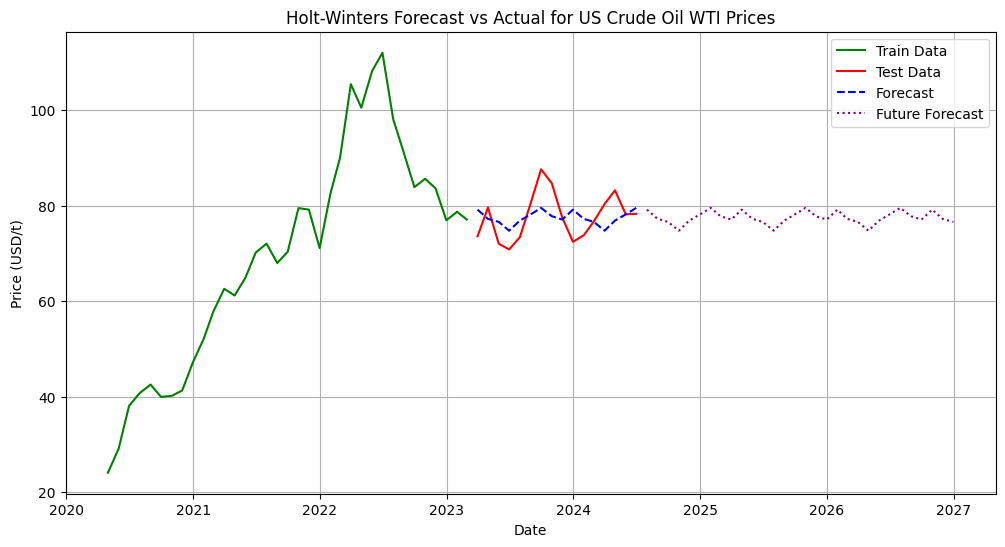


Processing Dubai Crude Oil...

Skipping (add, add, 1): seasonal_periods must be larger than 1.
Skipping (add, mul, 1): seasonal_periods must be larger than 1.
Skipping (mul, add, 1): seasonal_periods must be larger than 1.
Skipping (mul, mul, 1): seasonal_periods must be larger than 1.
Skipping (None, add, 1): seasonal_periods must be larger than 1.
Skipping (None, mul, 1): seasonal_periods must be larger than 1.


<ipython-input-9-1a78f18e12c8>:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index.max(), periods=31, freq="M")[1:]  # Generate future dates


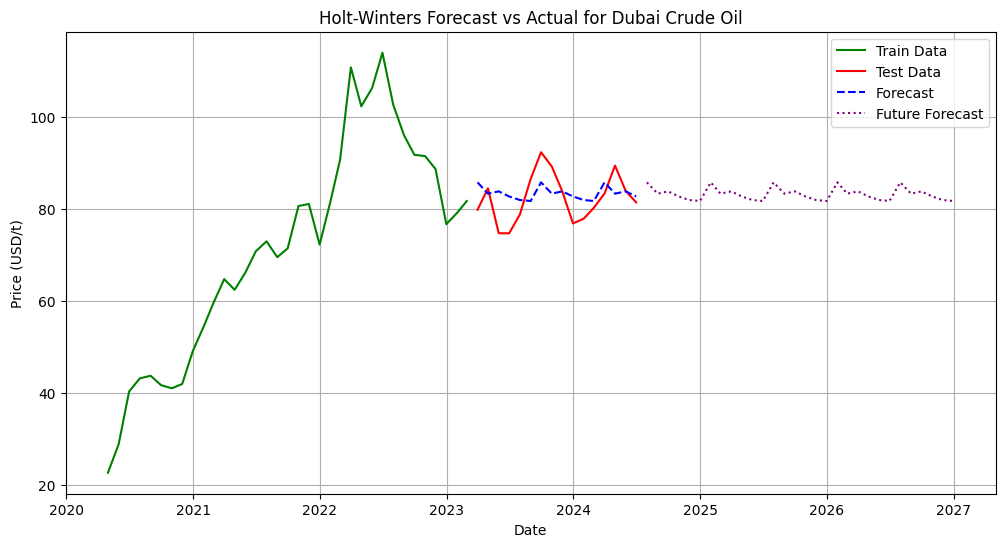


Processing Dutch Natural Gas...

Skipping (add, add, 1): seasonal_periods must be larger than 1.
Skipping (add, mul, 1): seasonal_periods must be larger than 1.
Skipping (mul, add, 1): seasonal_periods must be larger than 1.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Skipping (mul, mul, 1): seasonal_periods must be larger than 1.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Skipping (None, add, 1): seasonal_periods must be larger than 1.
Skipping (None, mul, 1): seasonal_periods must be larger than 1.


<ipython-input-9-1a78f18e12c8>:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index.max(), periods=31, freq="M")[1:]  # Generate future dates


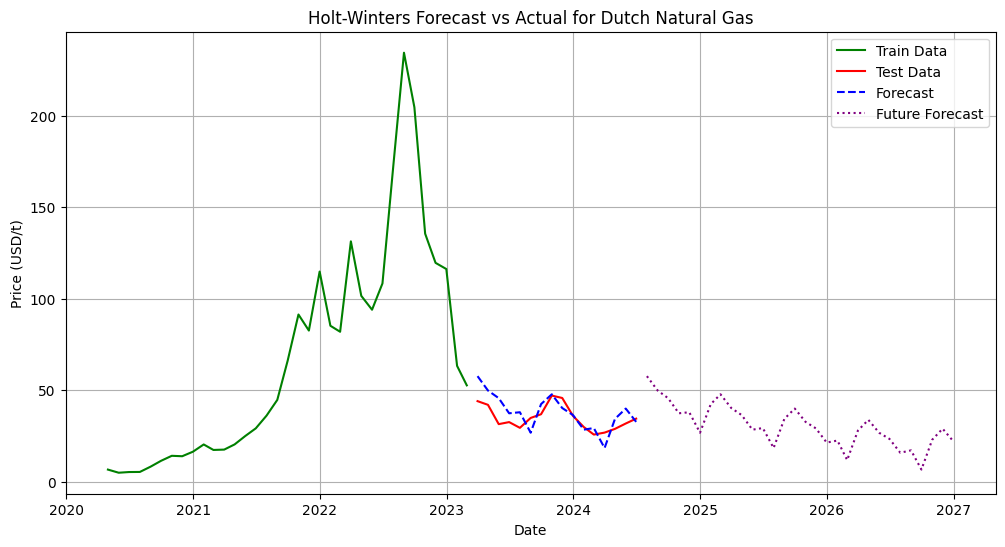


Final Results:
              Target Column Best Trend Best Seasonal  Seasonal Periods  \
0        Natural Gas Price       None           add                 2   
1  US Crude Oil WTI Prices       None           add                 9   
2          Dubai Crude Oil       None           mul                 6   
3        Dutch Natural Gas        mul           add                 7   

    MAPE (%)       MAE        MSE  R² Score  
0  12.713364  0.323780   0.188086 -0.039252  
1   4.888451  3.816759  20.820381  0.061012  
2   5.064106  4.116902  24.480491  0.056865  
3  18.174498  6.123612  53.460181 -0.275619  
✅ Saved test set forecasts to 'All_Test_and_Forecasted_Values.csv'
✅ Saved 30-month forecast to 'Future_30_Month_Forecast.csv'
✅ Forecasting complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert Date column to datetime and set as index
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
else:
    print("❌ Error: 'Date' column not found in DataFrame!")
    print("Available columns:", df.columns)
# ✅ Fix 1: Ensure the index has a proper frequency
df = df.resample("M").mean().asfreq("M")  # Resample to Monthly frequency

# Target columns to predict
target_columns = [
    'Natural Gas Price',
    'US Crude Oil WTI Prices',
    'Dubai Crude Oil',
    'Dutch Natural Gas'
]

# Holt-Winters optimization function
def holt_winters_grid_search(train, test, target_column, seasonal_periods_list):
    best_mape = float("inf")
    best_model = None
    best_params = None

    for trend in ["add", "mul", None]:
        for seasonal in ["add", "mul", None]:
            for seasonal_periods in seasonal_periods_list:
                try:
                    model = ExponentialSmoothing(
                        train[target_column], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods
                    )
                    model_fit = model.fit()
                    forecast = model_fit.forecast(len(test))

                    # ✅ Fix 2: Ensure alignment between test and forecast
                    test_values = test[target_column].dropna()
                    forecast_values = forecast.iloc[:len(test_values)]

                    mape = (abs(forecast_values - test_values) / test_values).mean() * 100

                    if mape < best_mape:
                        best_mape = mape
                        best_model = model_fit
                        best_params = (trend, seasonal, seasonal_periods)
                except Exception as e:
                    print(f"Skipping ({trend}, {seasonal}, {seasonal_periods}): {e}")
                    continue

    return best_model, best_params, best_mape

# Forecasting process
seasonal_periods_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
results = []
forecasted_df = None  # Dataframe to store test and forecasted values
future_forecast_df = None  # Dataframe to store 30-month forecast

for target_column in target_columns:
    print(f"\nProcessing {target_column}...\n")

    # Split data into train (70%) and test (30%)
    split_idx = int(len(df) * 0.7)
    train, test = df.iloc[:split_idx], df.iloc[split_idx:]

    # Find best Holt-Winters parameters
    best_model, best_params, best_mape = holt_winters_grid_search(train, test, target_column, seasonal_periods_list)

    if best_model:
        # Forecast strictly for the test set period
        forecast_values = best_model.forecast(len(test)).reset_index(drop=True)

        # Forecast for next 30 months
        future_dates = pd.date_range(start=df.index.max(), periods=31, freq="M")[1:]  # Generate future dates
        future_forecast_values = best_model.forecast(30)  # Predict next 30 months

        # ✅ Fix 3: Reset index to match forecast values
        test = test.reset_index()
        test[f"{target_column} Forecast"] = forecast_values

        # Merge all forecasts into a single DataFrame
        if forecasted_df is None:
            forecasted_df = test[["Date", target_column, f"{target_column} Forecast"]]
        else:
            forecasted_df = forecasted_df.merge(test[["Date", target_column, f"{target_column} Forecast"]], on="Date", how="left")

        # Store future forecast in a DataFrame
        future_forecast = pd.DataFrame({
            "Date": future_dates,
            f"{target_column} Forecast": future_forecast_values
        })

        if future_forecast_df is None:
            future_forecast_df = future_forecast
        else:
            future_forecast_df = future_forecast_df.merge(future_forecast, on="Date", how="left")

        # Compute error metrics
        mae = mean_absolute_error(test[target_column], test[f"{target_column} Forecast"])
        mse = mean_squared_error(test[target_column], test[f"{target_column} Forecast"])
        r2 = r2_score(test[target_column], test[f"{target_column} Forecast"])

        # Store results
        results.append({
            "Target Column": target_column,
            "Best Trend": best_params[0],
            "Best Seasonal": best_params[1],
            "Seasonal Periods": best_params[2],
            "MAPE (%)": best_mape,
            "MAE": mae,
            "MSE": mse,
            "R² Score": r2
        })

        # Plot results
        plt.figure(figsize=(12,6))
        plt.plot(train.index, train[target_column], label="Train Data", color="green")
        plt.plot(test["Date"], test[target_column], label="Test Data", color="red")
        plt.plot(test["Date"], test[f"{target_column} Forecast"], label="Forecast", linestyle="dashed", color="blue")
        plt.plot(future_forecast["Date"], future_forecast[f"{target_column} Forecast"], label="Future Forecast", linestyle="dotted", color="purple")
        plt.xlabel("Date")
        plt.ylabel("Price (USD/t)")
        plt.title(f"Holt-Winters Forecast vs Actual for {target_column}")
        plt.legend()
        plt.grid()
        plt.show()

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print("\nFinal Results:\n", results_df)

# ✅ Fix 4: Ensure DataFrame is not None before saving
if forecasted_df is not None:
    forecasted_df.to_csv("All_Test_and_Forecasted_Values.csv", index=False)
    print("✅ Saved test set forecasts to 'All_Test_and_Forecasted_Values.csv'")

if future_forecast_df is not None:
    future_forecast_df.to_csv("Future_30_Month_Forecast.csv", index=False)
    print("✅ Saved 30-month forecast to 'Future_30_Month_Forecast.csv'")

print("✅ Forecasting complete!")
